In [1]:
import matplotlib.pyplot as plt
import numpy
from numpy import genfromtxt
import csv
import pandas as pd
from operator import itemgetter
from datetime import*
print('External Library import Successful')
#######################################################################


External Library import Successful


In [2]:
def nearest(items, pivot):
    return min(items, key=lambda x: abs(x - pivot))
#######################################################################
def add_one_month(t):
    """Return a `datetime.date` or `datetime.datetime` (as given) that is
    one month earlier.

    Note that the resultant day of the month might change if the following
    month has fewer days:

        >>> add_one_month(datetime.date(2010, 1, 31))
        datetime.date(2010, 2, 28)
    """
    import datetime
    one_day = datetime.timedelta(days=1)
    one_month_later = t + one_day
    while one_month_later.month == t.month:  # advance to start of next month
        one_month_later += one_day
    target_month = one_month_later.month
    while one_month_later.day < t.day:  # advance to appropriate day
        one_month_later += one_day
        if one_month_later.month != target_month:  # gone too far
            one_month_later -= one_day
            break
    return one_month_later
#######################################################################
def subtract_one_month(t):
    """Return a `datetime.date` or `datetime.datetime` (as given) that is
    one month later.

    Note that the resultant day of the month might change if the following
    month has fewer days:

        >>> subtract_one_month(datetime.date(2010, 3, 31))
        datetime.date(2010, 2, 28)
    """
    import datetime
    one_day = datetime.timedelta(days=1)
    one_month_earlier = t - one_day
    while one_month_earlier.month == t.month or one_month_earlier.day > t.day:
        one_month_earlier -= one_day
    return one_month_earlier
#######################################################################
print('Custom Functions Loaded into the Program Successfully')
#######################################################################



Custom Functions Loaded into the Program Successfully


In [3]:
values=[]
dates=[]
combine=[]
with open('hyatt.csv', 'r') as csvFile:
    reader = csv.reader(csvFile)
    for row in reader:
        values.append(row[1])
        dates.append(row[1])
        combine.append(row)
csvFile.close()
#print(values)
#print(dates)
#print(combine)
print('External Data loaded successfully in the Program')


External Data loaded successfully in the Program


In [4]:
print('The Number of Values are: ',len(values))
print('The Number of Dates are:',len(dates))


The Number of Values are:  43184
The Number of Dates are: 43184


In [5]:
combine = sorted(combine, key=itemgetter(0))
"""for i in combine:
    print(i)"""
for i in combine:
    m2=i[0]
    m2=datetime.strptime(m2,'%d/%m/%y %I:%M %p')
    i[0]=m2
combine = sorted(combine, key=itemgetter(0))
"""for i in combine:
    print(i)"""
ref_min=combine[0][0].date()
min_time=datetime.strptime('0000','%H%M').time()
ref_min=datetime.combine(ref_min, min_time)
print(type(ref_min))
ref_max=combine[-1][0].date()
max_time=datetime.strptime('2359','%H%M').time()
ref_max=datetime.combine(ref_max, max_time)
print(ref_max)


<class 'datetime.datetime'>
2018-05-31 23:59:00


In [6]:
ref_max = add_one_month(ref_max)
dates=[]
for i in combine:
    dates.append(i[0])
i=ref_min
indices=[]
while i<ref_max:
    k=nearest(dates,i)
    print('The corresponding Lowest time related to this reading is: ',k)
    index=dates.index(k)
    print(index)
    indices.append(index)
    i = add_one_month(i)
    print(i)


The corresponding Lowest time related to this reading is:  2018-01-01 00:05:00
0
2018-02-01 00:00:00
The corresponding Lowest time related to this reading is:  2018-01-31 23:58:00
8850
2018-03-01 00:00:00
The corresponding Lowest time related to this reading is:  2018-02-28 23:58:00
16741
2018-04-01 00:00:00
The corresponding Lowest time related to this reading is:  2018-04-01 00:02:00
25669
2018-05-01 00:00:00
The corresponding Lowest time related to this reading is:  2018-05-01 00:02:00
34304
2018-06-01 00:00:00
The corresponding Lowest time related to this reading is:  2018-05-31 23:31:00
43183
2018-07-01 00:00:00


In [7]:
print('The Number of Indices are: ',len(indices))
k=ref_min.date()
consump=[]
lower=[]
upper=[]
for i in range(len(indices)-1):
    r_min=float(values[indices[i]])
    lower.append(r_min)
    r_up=float(values[indices[i+1]])
    upper.append(r_up)
    consumption=r_up-r_min
    consump.append(consumption)
    print('The Consumption on ',k.strftime('%d-%m-%Y'),' is : ',consumption)
    k = add_one_month(k)


The Number of Indices are:  6
The Consumption on  01-01-2018  is :  830609.2499999999
The Consumption on  01-02-2018  is :  872401.3700000001
The Consumption on  01-03-2018  is :  1093021.5
The Consumption on  01-04-2018  is :  1184403.0
The Consumption on  01-05-2018  is :  1312053.5


In [8]:
rate=float(input('Enter the Rate per KWH consumed for Cost Calculation: '))


Enter the Rate per KWH consumed for Cost Calculation: 10


In [9]:
k=ref_min.date()
cost=[]
for i in consump:
    r=float(i)*rate
    print('The Cost of Electricity for ',k.strftime('%d-%m-%Y'),' is :',r)
    cost.append(r)
    k = add_one_month(k)


The Cost of Electricity for  01-01-2018  is : 8306092.499999999
The Cost of Electricity for  01-02-2018  is : 8724013.700000001
The Cost of Electricity for  01-03-2018  is : 10930215.0
The Cost of Electricity for  01-04-2018  is : 11844030.0
The Cost of Electricity for  01-05-2018  is : 13120535.0


In [10]:
print('\n====================Final Output====================\n')
k=ref_min.date()
date_list=[]
write=[]
cust=input('Please Enter The Customer Name:  ')



====================Final Output====================

Please Enter The Customer Name:  Siemens Kalwa


In [11]:
row=['Customer Name: ',cust]
write.append(row)
row=['Address Line 1: ',"3, National Hwy 9, Premnagar, "]
write.append(row)
row=['Address Line 2: ',"Ashok Nagar, Pune, Maharashtra 411016"]
write.append(row)
row=['']
write.append(row)
row=['Electricity Bill Invoice']
write.append(row)
row=['From: ',ref_min.date()]
write.append(row)
row=['To: ',subtract_one_month(ref_max.date())+timedelta(days=1)]
write.append(row)
row=['']
write.append(row)
row=['Reading Date','Previous Reading','Present Reading','Consumption','Cost']
write.append(row)
for i in range(len(indices)-1):
    row=[]
    print('--------------------------------------')
    print('Date:\t\t',k)
    row.append(k)
    date_list.append(k)
    k = add_one_month(k)
    print('Lower Reading:\t',lower[i])
    row.append(lower[i])
    print('Upper Reading:\t',upper[i])
    row.append(upper[i])
    print('Consumption:\t',consump[i])
    row.append(consump[i])
    print('Cost:\t\t',cost[i])
    row.append(cost[i])
    write.append(row)


--------------------------------------
Date:		 2018-01-01
Lower Reading:	 940770.88
Upper Reading:	 1771380.13
Consumption:	 830609.2499999999
Cost:		 8306092.499999999
--------------------------------------
Date:		 2018-02-01
Lower Reading:	 1771380.13
Upper Reading:	 2643781.5
Consumption:	 872401.3700000001
Cost:		 8724013.700000001
--------------------------------------
Date:		 2018-03-01
Lower Reading:	 2643781.5
Upper Reading:	 3736803.0
Consumption:	 1093021.5
Cost:		 10930215.0
--------------------------------------
Date:		 2018-04-01
Lower Reading:	 3736803.0
Upper Reading:	 4921206.0
Consumption:	 1184403.0
Cost:		 11844030.0
--------------------------------------
Date:		 2018-05-01
Lower Reading:	 4921206.0
Upper Reading:	 6233259.5
Consumption:	 1312053.5
Cost:		 13120535.0


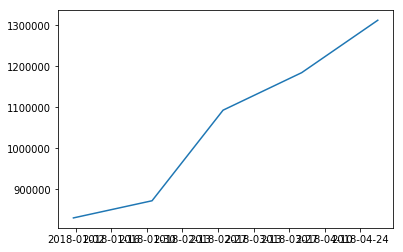

<Figure size 432x288 with 0 Axes>

In [12]:
plt.plot(date_list,consump)
plt.show()
plt.savefig('graph.png')


In [13]:
row=['Total Consumption: ', sum(consump)]
write.append(row)
row=['Cost Per Unit: ',rate]
write.append(row)
row=['Total Bill Ammount: ',sum(cost)]
write.append(row)
with open('output.csv', 'w') as csvFile:
    for row in write:
        writer = csv.writer(csvFile,lineterminator='\n')
        writer.writerow(row)
csvFile.close()
print('CSV file generated as OUTPUT.CSV')

CSV file generated as OUTPUT.CSV
